## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

## Path to the data

In [2]:
PATH = 'Dataset'
PATH_TO_train_data = PATH + '/' + 'train.csv'
PATH_TO_test_data = PATH + '/' + 'test.csv'
PATH_TO_building_structure = PATH + '/' + 'Building_Structure.csv'
PATH_TO_building_ownership = PATH + '/' + 'Building_Ownership_Use.csv'

In [3]:
train_data = pd.read_csv(PATH_TO_train_data)

In [4]:
building_structure_data = pd.read_csv(PATH_TO_building_structure)
building_ownership_data = pd.read_csv(PATH_TO_building_ownership)

## Shape of different data sets

In [5]:
train_data.shape

(631761, 14)

In [6]:
building_structure_data.shape

(1052948, 29)

In [7]:
building_ownership_data.shape

(1052948, 17)

## Distribution of classes: 5 tier classification problem

In [8]:
%matplotlib inline

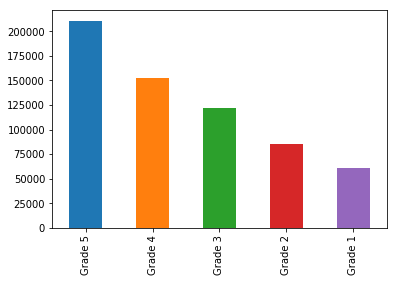

In [9]:
train_data.damage_grade.value_counts().plot('bar')

## Merge building structure data with train data using "building_id"

In [10]:
train_data = pd.merge(train_data, building_structure_data, on='building_id')

In [11]:
train_data.shape

(631761, 42)

## Merge building ownership data with train data using "building_id"

In [12]:
train_data = pd.merge(train_data, building_ownership_data, on='building_id')

In [13]:
train_data.shape

(631761, 58)

In [14]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data types of all columns. Change all the non-numeric columns into one hot representation.

In [15]:
train_data.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


## Store all the columns in a list that are non numeric columns

In [16]:
object_type_columns = ['area_assesed', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'legal_ownership_status']

In [17]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Change columns into one hot vectors

In [18]:
train_data = pd.get_dummies(train_data, columns=object_type_columns, prefix_sep='_', drop_first=True)

In [19]:
train_data.head()

,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Find the columns that has missing values

In [20]:
columns_has_NaN = train_data.isna().sum()

In [21]:
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]

In [22]:
columns_has_NaN

has_repair_started    33417
count_families            1
dtype: int64

In [23]:
total_NaN = columns_has_NaN.sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 33418


## Replace missing values in the column "has repair started" and "count_families" as zero

In [24]:
train_data.fillna(0, inplace=True)

In [25]:
total_NaN = train_data.isna().sum().sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 0


## Train data after preprocessing

In [26]:
train_data.head()

,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Remove target value from the train data.

In [27]:
X_train = train_data.drop(columns=['damage_grade', 'building_id'])
X_train.head()

,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,24,0.0,0,0,0,0,0,0,0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,44,0.0,0,0,0,0,0,0,0,1.0,...,0,1,0,0,0,0,0,0,1,0
2,36,0.0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,30,0.0,0,0,0,0,0,0,0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,36,0.0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,1,0


In [28]:
total_number_of_features = len(X_train.columns)
print("Total number of features after pre processing = " + str(total_number_of_features))

Total number of features after pre processing = 87


In [29]:
y_train = pd.DataFrame(train_data.damage_grade)
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [30]:
categories = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
y_train_categories = y_train.damage_grade.map(categories)
y_train_categories = pd.DataFrame({'damage_grade': y_train_categories})
y_train_categories.head()

,damage_grade
0,4
1,2
2,1
3,5
4,3


In [31]:
y_train = pd.get_dummies(y_train)
y_train.head()

,damage_grade_Grade 1,damage_grade_Grade 2,damage_grade_Grade 3,damage_grade_Grade 4,damage_grade_Grade 5
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0


## Test data: Preprocess test data similar to train data.

In [32]:
test_data = pd.read_csv(PATH_TO_test_data)
test_data = pd.merge(test_data, building_structure_data, on='building_id')
test_data = pd.merge(test_data, building_ownership_data, on='building_id')
test_data = pd.get_dummies(test_data, columns=object_type_columns, prefix_sep='_', drop_first=True)

columns_has_NaN = test_data.isna().sum()
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]

test_data.fillna(0, inplace=True)

X_test = test_data.drop(columns=['building_id'])

In [33]:
X_test.head()

,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,7,0.0,0,0,0,0,0,0,0,1.0,...,0,1,0,0,0,0,0,0,1,0
1,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,1,0,0,0,1,0
2,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,1,0,0,0,0,0,1,0
3,7,0.0,0,0,0,0,0,0,0,1.0,...,0,1,0,0,0,0,0,0,1,0
4,7,0.0,0,0,0,0,0,0,0,1.0,...,0,0,1,0,0,0,0,0,1,0


## Save predictions

In [34]:
def save_predictions(y_test_pred, test_data):
    y_test_pred_df = pd.DataFrame({'damage_grade': y_test_pred})
    y_test_pred_df['damage_grade'] += 1
    y_test_pred_df = y_test_pred_df.astype(str)
    y_test_pred_df['damage_grade'] = 'Grade ' + y_test_pred_df['damage_grade']

    # Add building_id to the Data frame.
    y_test_pred_df['building_id'] = test_data.building_id
    y_test_pred_df = pd.DataFrame({'building_id': y_test_pred_df.building_id, 'damage_grade': y_test_pred_df.damage_grade})
    y_test_pred_df.to_csv('prediction.csv', index=False)
    return y_test_pred_df

In [35]:
def feature_importance(model, X_train):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_train.columns
    important_features = []
    important_features_scores = []
    for index in indices:
        important_features.append(features[index])
        important_features_scores.append(importances[index])
    feature_importance_df = pd.Series(data=important_features_scores, index=important_features)
    return feature_importance_df

## Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost

## Decision Tree Classifier
Accuracy on train data: 99.64 <br>
Score on test data: 0.68044

In [ ]:
dtClassifier = DecisionTreeClassifier()
model = dtClassifier.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
Accuracy = accuracy_score(y_train, y_train_pred) * 100

In [ ]:
y_train_pred

In [ ]:
Accuracy

In [ ]:
feature_importance_df = feature_importance(model, X_train)
feature_importance_df.iloc[:25].plot('bar')

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

In [ ]:
y_test_pred_int = np.argmax(y_test_pred, axis=1)

In [ ]:
save_predictions(y_test_pred_int, test_data).head()

## Random Forest Classifier
Accuracy on train data: 96.6928949397003 <br>
Score on test data: 0.66722

In [ ]:
rfClassifier = RandomForestClassifier()
model = rfClassifier.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
Accuracy = accuracy_score(y_train, y_train_pred) * 100

In [ ]:
y_train_pred

In [ ]:
Accuracy

In [ ]:
feature_importance_df = feature_importance(model, X_train)
feature_importance_df.iloc[:25].plot('bar')

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

In [ ]:
y_test_pred_int = np.argmax(y_test_pred, axis=1)

In [ ]:
save_predictions(y_test_pred_int, test_data).head()

## xgBoost Classifier
Accuracy on train data: 71.74010424828377 <br>
Score on test data: 0.66722

In [ ]:
# xgbClassifier = xgboost.XGBClassifier()
# model = xgbClassifier.fit(X_train, y_train_categories)

## SVC
Accuracy on train data:  <br>
Score on test data: 

In [ ]:
svClassifier = SVC(kernel='linear')
model = svClassifier.fit(X_train, y_train_categories.damage_grade)

In [ ]:
y_train_pred = model.predict(X_train)
Accuracy = accuracy_score(y_train, y_train_pred) * 100

In [ ]:
y_train_pred

In [ ]:
Accuracy

In [ ]:
feature_importance_df = feature_importance(model, X_train)
feature_importance_df.iloc[:25].plot('bar')

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

In [ ]:
y_test_pred_int = np.argmax(y_test_pred, axis=1)

In [ ]:
save_predictions(y_test_pred_int, test_data).head()